In [33]:
import pandas as pd

# Chemin du fichier CSV
chemin_fichier = "archive/enron_data_fraud_labeled.csv"

# Charger les 200 exemples
df_200_exemples = pd.read_csv(chemin_fichier, nrows=201)

# Sauvegarder dans un fichier JSON avec un format liste d'objets
df_200_exemples.to_json("200_exemples.json", orient="records", indent=4, force_ascii=False)


In [2]:
import pandas as pd

# Charger le fichier JSON
chemin_fichier = "200_exemples.json"
df = pd.read_json(chemin_fichier)

# df = df[colonnes_a_garder].dropna()  # Supprimer les emails sans contenu

# Afficher un aperçu des données
print(df.head())


  Folder-User Folder-Name                                     Message-ID  \
0     maildir    arnold-j  <17334447.1075857585446.JavaMail.evans@thyme>   
1     maildir    arnold-j  <19171686.1075857585034.JavaMail.evans@thyme>   
2     maildir    arnold-j  <29887033.1075857630725.JavaMail.evans@thyme>   
3     maildir    arnold-j   <2526360.1075857584903.JavaMail.evans@thyme>   
4     maildir    arnold-j  <30102065.1075857630952.JavaMail.evans@thyme>   

                                    Date                     From  \
0  Thu, 16 Nov 2000 09:30:00 -0800 (PST)          msagel@home.com   
1   Fri, 8 Dec 2000 05:05:00 -0800 (PST)  slafontaine@globalp.com   
2  Tue, 15 May 2001 09:43:00 -0700 (PDT)  iceoperations@intcx.com   
3  Mon, 11 Dec 2000 23:52:00 -0800 (PST)       klarnold@flash.net   
4  Mon, 14 May 2001 23:59:00 -0700 (PDT)    soblander@carrfut.com   

                                                  To  \
0                                  jarnold@enron.com   
1               

In [3]:
# Colonnes importantes
colonnes_a_garder = ['Date', 'From', 'To', 'Subject', 'Body', 'Label']

# Filtrer les données
df = df[colonnes_a_garder]

# Afficher un aperçu
print(df.head())


                                    Date                     From  \
0  Thu, 16 Nov 2000 09:30:00 -0800 (PST)          msagel@home.com   
1   Fri, 8 Dec 2000 05:05:00 -0800 (PST)  slafontaine@globalp.com   
2  Tue, 15 May 2001 09:43:00 -0700 (PDT)  iceoperations@intcx.com   
3  Mon, 11 Dec 2000 23:52:00 -0800 (PST)       klarnold@flash.net   
4  Mon, 14 May 2001 23:59:00 -0700 (PDT)    soblander@carrfut.com   

                                                  To  \
0                                  jarnold@enron.com   
1                              john.arnold@enron.com   
2  icehelpdesk@intcx.com, internalmarketing@intcx...   
3                              john.arnold@enron.com   
4                              soblander@carrfut.com   

                                             Subject  \
0                                             Status   
1                                 re:summer inverses   
2                      The WTI Bullet swap contracts   
3  Fwd: NYTimes.com Arti

In [5]:
import pandas as pd

# Convertir la colonne Date en un format standard
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraire uniquement la date (sans heure)
df['Date_Simplifiee'] = df['Date'].dt.strftime('%Y-%m-%d')

# Afficher un aperçu
print(df[['Date', 'Date_Simplifiee']].head())

                       Date Date_Simplifiee
0 2000-11-16 09:30:00-08:00      2000-11-16
1 2000-12-08 05:05:00-08:00      2000-12-08
2                       NaT             NaN
3 2000-12-11 23:52:00-08:00      2000-12-11
4                       NaT             NaN


In [6]:
# Compter les emails par expéditeur
emails_par_expéditeur = df['From'].value_counts()
print(emails_par_expéditeur)

# Filtrer les messages frauduleux
messages_frauduleux = df[df['Label'] == 1]
print("Le nombre de message frauduleux : ", messages_frauduleux.size)


From
soblander@carrfut.com                  24
capstone@ktc.com                       11
mark@capstone-ta.com                    8
dailyquote@smtp.quote.com               7
info@winebid.com                        6
                                       ..
michael.gapinski@ubspainewebber.com     1
c10mkf@msn.com                          1
310fkn6iqva@msn.com                     1
nyadmin@intcx.com                       1
kward1@houston.rr.com                   1
Name: count, Length: 87, dtype: int64
Le nombre de message frauduleux :  91


In [9]:
# Calculer la proportion
total_messages = len(df)
frauduleux_messages = len(messages_frauduleux)
proportion_frauduleux = (frauduleux_messages / total_messages) * 100
print(f"Proportion de messages frauduleux : {proportion_frauduleux:.2f}%")


Proportion de messages frauduleux : 6.47%


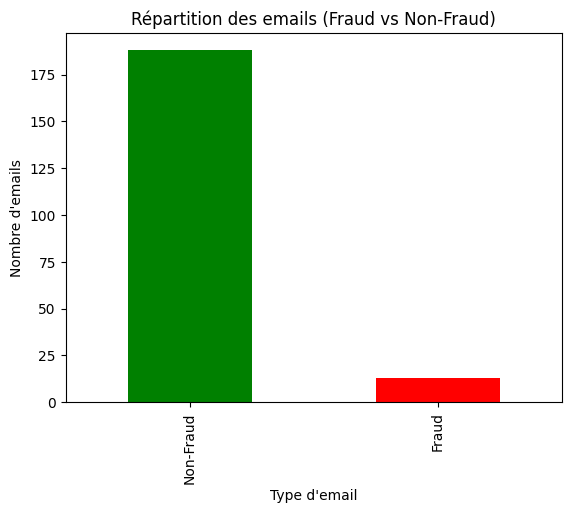

In [11]:
import matplotlib.pyplot as plt
# Répartition des labels
df['Label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Répartition des emails (Fraud vs Non-Fraud)")
plt.xlabel("Type d'email")
plt.ylabel("Nombre d'emails")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

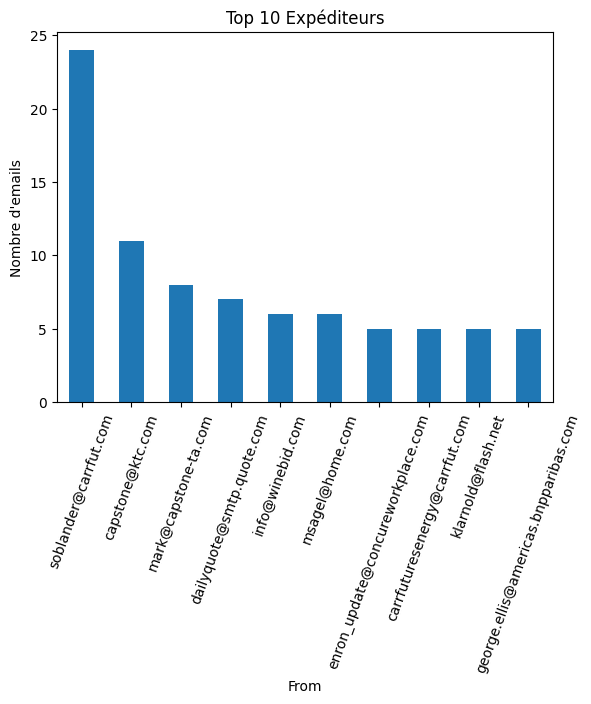

In [12]:
import matplotlib.pyplot as plt

# Top 10 expéditeurs
df['From'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Expéditeurs")
plt.ylabel("Nombre d'emails")
plt.xticks(rotation=70)
plt.show()



In [43]:
# import re

# def nettoyer_texte(texte):
#     texte = re.sub(r'\s+', ' ', texte)  # Supprime les espaces multiples
#     texte = re.sub(r'[^\w\s.,]', '', texte)  # Supprime les caractères spéciaux
#     texte = texte.strip()  # Supprime les espaces au début et à la fin
#     return texte

In [44]:
# def construire_prompt(texte):
#     return (
#         f"summarize: {texte}\n"
#         "Focus on the sender's intention, expectations, and actions they want to be taken."
#     )

In [45]:
# from transformers import pipeline

# # Charger un pipeline de résumé avec T5-Small
# summarizer = pipeline("summarization", model="google-t5/t5-3b", tokenizer="google-t5/t5-3b")

# # Email à résumer
# texte = df['Body'].iloc[0]  # Premier email
# texte_nettoye = nettoyer_texte(texte)
# prompt = construire_prompt(texte_nettoye)

# # Résumer le texte
# resume = summarizer(prompt, max_length=100, min_length=30, do_sample=False)

# # Afficher le résultat
# print("Email à résumer :", texte_nettoye)
# print("Résumé :", resume[0]['summary_text'])


In [46]:
# import re
# from transformers import pipeline, AutoTokenizer

# # Nettoyage du texte
# def nettoyer_texte(texte):
#     texte = re.sub(r'\s+', ' ', texte)  # Supprime les espaces multiples
#     texte = re.sub(r'[^\w\s.,]', '', texte)  # Supprime les caractères spéciaux
#     return texte.strip()  # Supprime les espaces au début et à la fin

# # Construire le prompt
# def construire_prompt(texte):
#     return (
#         f"summarize: {texte}\n"
#         "Summarize the email in one clear and concise sentence, avoiding repetition."
#     )

# # Charger le pipeline de résumé
# summarizer = pipeline("summarization", model="google-t5/t5-3b", tokenizer="google-t5/t5-3b")
# tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-3b")

# # Résumer un email
# def resumer_email(texte, summarizer, tokenizer):
#     # Nettoyer le texte
#     texte_nettoye = nettoyer_texte(texte)
#     prompt = construire_prompt(texte_nettoye)
    
#     # Encoder le prompt
#     tokens = tokenizer(prompt, return_tensors="pt")['input_ids']
#     input_length = tokens.size(1)

#     # Ajuster dynamiquement les longueurs
#     max_length = max(30, int(input_length * 0.7))  # 70% de la longueur d'entrée
#     min_length = max(10, int(input_length * 0.4))  # 40% de la longueur d'entrée

#     # Générer le résumé
#     resume = summarizer(prompt, max_length=max_length, min_length=min_length, do_sample=False)
    
#     return texte_nettoye, resume[0]['summary_text'], input_length

# # Exemple : traiter un email
# texte = df['Body'].iloc[0]  # Premier email du dataset
# texte_nettoye, resume, input_length = resumer_email(texte, summarizer, tokenizer)

# # Afficher le résultat
# print(f"Longueur de l'entrée : {input_length} tokens")
# print("Email à résumer :", texte_nettoye)
# print("Résumé :", resume)


In [47]:
# import re
# from transformers import pipeline, AutoTokenizer

# def nettoyer_texte(texte):
#     """Nettoie le texte en supprimant les espaces et caractères spéciaux."""
#     texte = re.sub(r'\s+', ' ', texte)
#     texte = re.sub(r'[^\w\s.,]', '', texte)
#     return texte.strip()

# def construire_prompt(texte):
#     """
#     Construit un prompt très précis pour guider le résumé.
#     """
#     return (
#         "Professional email summary: Briefly explain the sender's main intent, "
#         "key context, and specific request. Capture the essence concisely. "
#         f"{texte}"
#     )

# def resumer_email(texte, model_name="google-t5/t5-3b"):
#     """
#     Résume un email avec des paramètres très précis.
#     """
#     # Nettoyer le texte
#     texte_nettoye = nettoyer_texte(texte)
    
#     # Initialiser le pipeline et le tokenizer
#     summarizer = pipeline("summarization", model=model_name)
#     tokenizer = AutoTokenizer.from_pretrained(model_name)
    
#     # Construire le prompt
#     prompt = construire_prompt(texte_nettoye)
    
#     # Encoder le prompt pour obtenir sa longueur
#     tokens = tokenizer(prompt, return_tensors="pt")['input_ids']
#     input_length = tokens.size(1)
    
#     # Ajuster dynamiquement les longueurs
#     max_length = max(50, int(input_length * 0.5))  # Réduit à 50%
#     min_length = max(20, int(input_length * 0.3))  # Maintient à 30%
    
#     # Générer le résumé
#     resume = summarizer(
#         prompt, 
#         max_length=max_length, 
#         min_length=min_length, 
#         do_sample=False,
#         num_beams=4,  
#         early_stopping=True
#     )
    
#     return texte_nettoye, resume[0]['summary_text'], input_length

# # Exemple d'utilisation
# def main(texte):
#     texte_nettoye, resume, input_length = resumer_email(texte)
#     print(f"Longueur de l'entrée : {input_length} tokens")
#     print("Email nettoyé :", texte_nettoye)
#     print("Résumé :", resume)

# # Vous pouvez remplacer df['Body'].iloc[0] par votre texte
# main(df['Body'].iloc[0])

In [48]:
# def construire_prompt_avec_exemples(texte):
#     exemples = """
# Example 1:
# Email: Hi John, I just wanted to follow up on the documents I sent last week. Let me know if you have any questions.
# Summary: Follow-up on documents sent last week, asking for feedback.

# Example 2:
# Email: Hello, I hope this email finds you well. I'm writing to confirm our meeting scheduled for tomorrow at 10 AM. Please let me know if the time works for you.
# Summary: Confirmation of a meeting scheduled for tomorrow at 10 AM.

# Example 3:
# Email: Status John, I'm not really sure what happened between us. I was under the impression after my visit to Houston that we were about to enter into a trial agreement for my advisory work. Somehow, this never occurred. Did I say or do something wrong to screw this up? Best wishes, Mark.
# Summary: Seeking clarification about a trial agreement after a visit to Houston, asking if the project is still viable.

# Your task:
# Summarize the following email in one clear and concise sentence, avoiding repetition:
# """
#     return f"{exemples}\n{texte}"


In [49]:
# # Résumer un email avec des exemples
# def resumer_email_avec_exemples(texte, summarizer, tokenizer):
#     texte_nettoye = nettoyer_texte(texte)
#     prompt = construire_prompt_avec_exemples(texte_nettoye)

#     # Encoder le prompt
#     tokens = tokenizer(prompt, return_tensors="pt")['input_ids']
#     input_length = tokens.size(1)

#     # Ajuster dynamiquement les longueurs
#     max_length = max(30, int(input_length * 0.7))
#     min_length = max(10, int(input_length * 0.4))

#     # Générer le résumé
#     resume = summarizer(prompt, max_length=max_length, min_length=min_length, do_sample=False)
#     return texte_nettoye, resume[0]['summary_text'], input_length

# # Exemple : traiter un email
# texte = df['Body'].iloc[0]
# texte_nettoye, resume, input_length = resumer_email_avec_exemples(texte, summarizer, tokenizer)

# # Afficher le résultat
# print(f"Longueur de l'entrée : {input_length} tokens")
# print("Email à résumer :", texte_nettoye)
# print("Résumé :", resume)


## google/gemma-2b-it

In [50]:
# from transformers import AutoTokenizer, AutoModelForCausalLM

# # Charger le modèle et le tokenizer
# tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b-it")
# model = AutoModelForCausalLM.from_pretrained(
#     "google/gemma-2b-it", 
#     torch_dtype=torch.float32  # Vous pouvez utiliser torch.float16 pour GPU
# )


In [51]:
# import re

# def nettoyer_texte(texte):
#     texte = re.sub(r'\s+', ' ', texte)  # Supprimer les espaces multiples
#     texte = re.sub(r'[^\w\s.,]', '', texte)  # Supprimer les caractères spéciaux
#     texte = re.sub(r'(Best wishes|Regards|Sincerely).+', '', texte, flags=re.IGNORECASE)  # Supprimer les signatures
#     texte = re.sub(r'\b\d{7,}\b', '', texte)  # Supprimer les numéros longs (téléphones)
#     return texte.strip()


In [52]:
# def construire_prompt(texte):
#     exemples = """
# Example 1:
# Email: Hi John, I just wanted to follow up on the documents I sent last week. Let me know if you have any questions.
# Summary: Follow-up on documents sent last week, asking for feedback.

# Example 2:
# Email: Hello, I hope this email finds you well. I'm writing to confirm our meeting scheduled for tomorrow at 10 AM. Please let me know if the time works for you.
# Summary: Confirmation of a meeting scheduled for tomorrow at 10 AM.

# Your task:
# Summarize the following email in one clear and concise sentence:
# """
#     return f"{exemples}{texte}"


In [53]:
# def resumer_email(texte):
#     texte_nettoye = nettoyer_texte(texte)
#     prompt = construire_prompt(texte_nettoye)

#     # Encodage du texte
#     inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)

#     # Génération du résumé
#     outputs = model.generate(
#         input_ids=inputs["input_ids"], 
#         max_new_tokens=100,  # Nombre maximal de tokens générés
#         min_new_tokens=30,   # Nombre minimal de tokens générés
#         do_sample=False  # Désactiver l'échantillonnage pour une sortie déterministe
#     )

#     # Décodage du texte généré
#     resume = tokenizer.decode(outputs[0], skip_special_tokens=True)
#     return texte_nettoye, resume


In [54]:
# # Exemple d'email
# texte = df['Body'].iloc[0]
# # Résumer l'email
# texte_nettoye, resume = resumer_email(texte)

# # Afficher le résultat
# print("Email à résumer :", texte_nettoye)
# print("Résumé :", resume)


## facebook/opt-2.7b
Pas efficace pour les resume

In [64]:
import re
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Charger le modèle et le tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-2.7b")
model = AutoModelForCausalLM.from_pretrained("facebook/opt-2.7b", torch_dtype=torch.float32)

# Nettoyage du texte
def nettoyer_texte(texte):
    texte = re.sub(r'\s+', ' ', texte)  # Supprimer les espaces multiples
    texte = re.sub(r'[^\w\s.,]', '', texte)  # Supprimer les caractères spéciaux
    texte = re.sub(r'(Best wishes|Regards|Sincerely).+', '', texte, flags=re.IGNORECASE)  # Supprimer les signatures
    return texte.strip()

# Construire un prompt plus concis
def construire_prompt(texte):
    return (
        f"Summarize the email below in one or two sentences, focusing on the main message and intent:\n\n"
        f"Email: {texte}\n\n"
        "Summary:"
    )

# Résumer un email
def resumer_email(texte):
    texte_nettoye = nettoyer_texte(texte)
    prompt = construire_prompt(texte_nettoye)

    # Encoder le prompt
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)

    # Génération
    outputs = model.generate(
        input_ids=inputs["input_ids"], 
        max_new_tokens=50,
        temperature=0.7,
        do_sample=True  # Désactiver l'échantillonnage pour obtenir un résumé plus cohérent
    )

    # Décoder la sortie
    resume = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return texte_nettoye, resume

# Exemple de texte à résumer
texte = df['Body'].iloc[0]

texte_nettoye, resume = resumer_email(texte)

# Afficher le résultat
print("Email à résumer :", texte_nettoye)
print("Résumé :", resume)


Email à résumer : Status John Im not really sure what happened between us. I was under the impression after my visit to Houston that we were about to enter into a trial agreement for my advisory work. Somehow,this never occurred. Did I say or do something wrong to screw this up I dont know if youve blown this whole thing off, but I still hope you are interested in tryingto create an arrangement. As a courtesy, here is my report from this past weekend. If you are no longer interested in my work, please tell me so.
Résumé : Summarize the email below in one or two sentences, focusing on the main message and intent:

Email: Status John Im not really sure what happened between us. I was under the impression after my visit to Houston that we were about to enter into a trial agreement for my advisory work. Somehow,this never occurred. Did I say or do something wrong to screw this up I dont know if youve blown this whole thing off, but I still hope you are interested in tryingto create an arra

## Phi-3
necessite un gpu

In [21]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Charger le modèle et le tokenizer
model_id = "microsoft/Phi-3-small-128k-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float32,  # Forcer l'utilisation de float32 pour CPU
    trust_remote_code=True
)

# Déplacer le modèle sur le CPU (car pas de GPU disponible)
device = "cpu"
model = model.to(device)

def nettoyer_texte(texte):
    # Supprimer les espaces multiples et les caractères spéciaux
    import re
    texte = re.sub(r'\s+', ' ', texte)
    texte = re.sub(r'[^\w\s.,]', '', texte)
    return texte.strip()

def resumer_email(texte):
    # Nettoyer le texte
    texte_nettoye = nettoyer_texte(texte)
    
    # Préparer le prompt dans le format spécifique à Phi-3
    prompt = f"<|endoftext|><|user|>\nSummarize this email in one or two sentences, focusing on the main message and intent:\n\n{texte_nettoye}\n<|end|>\n<|assistant|>"
    
    # Encoder le prompt
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512).to(device)
    
    # Générer le résumé
    outputs = model.generate(
        input_ids=inputs["input_ids"], 
        max_new_tokens=50,
        temperature=0.7,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )
    
    # Décoder le résumé
    resume = tokenizer.decode(outputs[0][inputs["input_ids"].shape[1]:], skip_special_tokens=True)
    
    return texte_nettoye, resume

# Exemple d'utilisation avec un texte fictif (remplacez avec vos données)
texte = "This email contains a summary of the latest project updates and next steps for the team."
texte_nettoye, resume = resumer_email(texte)

print("Email à résumer :", texte_nettoye)
print("Résumé :", resume)


Encountered exception while importing triton: No module named 'triton'


ImportError: This modeling file requires the following packages that were not found in your environment: triton. Run `pip install triton`